In [61]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [62]:
plt.rcParams['figure.figsize'] = [16, 8]

# Trouvons tous les contours principaux

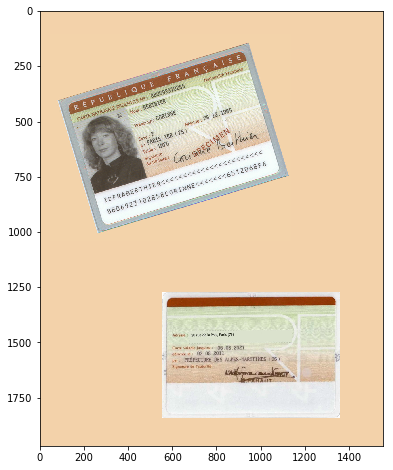

In [63]:
im = cv.imread('CI RetV.png')
plt.imshow(im)

## On passe en niveau de gris

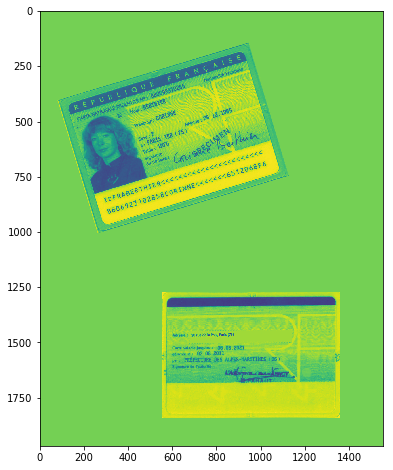

In [64]:
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
plt.imshow(imgray)

## On utilise l'agorithme de détection de bords "Canny" (via OpenCV)

Au préalable on applique un flou gaussien (également connu sous le nom de lissage gaussien) qui donne le flou d'une image par une fonction gaussienne.

On applique ensuite un détecteur de bord Canny qui est un algorithme à plusieurs étages qui permet de détecter une large gamme de bords dans les images. Il a été développé par John F. Canny en 1986.

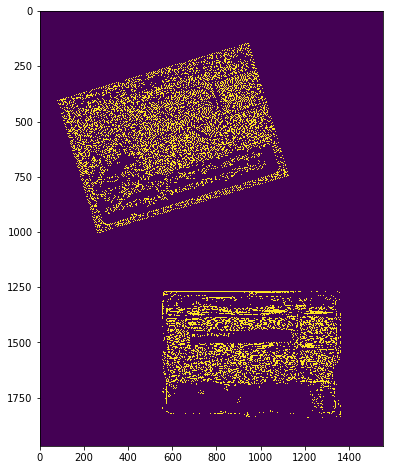

In [65]:
grayf = cv.GaussianBlur(imgray, (1, 1), 0)
edged = cv.Canny(grayf, 0, 50)
plt.imshow(edged)

## Détection de contours

Un seuillage avant :

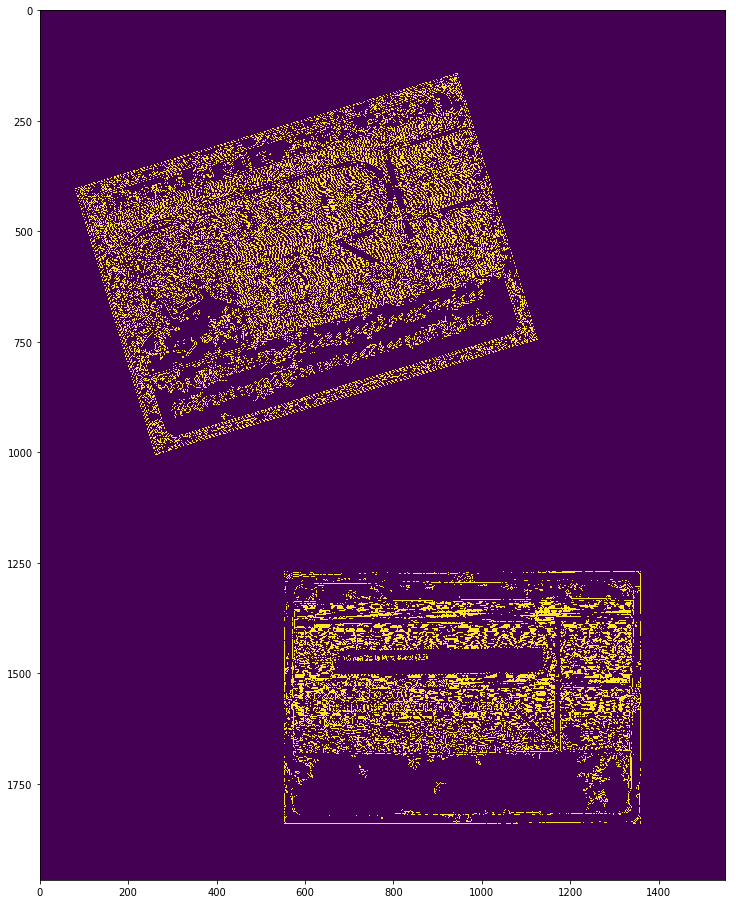

In [66]:
plt.rcParams['figure.figsize'] = [32, 16]
ret, thresh = cv.threshold(edged, 127, 255, 0)
plt.imshow(thresh)

In [75]:
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

In [83]:
contours = sorted(contours, key=cv.contourArea, reverse=True)

In [90]:
def find_display_contour(edge_img_arr):
    display_contour = None
    edge_copy = edge_img_arr.copy()
    contours,hierarchy = cv.findContours(edge_copy, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    top_cntrs = sorted(contours, key = cv.contourArea, reverse = True)[:10]

    for cntr in top_cntrs:
        peri = cv.arcLength(cntr,True)
        approx = cv.approxPolyDP(cntr, 0.02 * peri, True)
        if len(approx) == 4:
            display_contour = approx
            break
            
    return display_contour 

In [95]:
c = find_display_contour(thresh)
c

array([[[ 967,  332]],

       [[1068,  732]],

       [[ 285,  962]],

       [[1069,  732]]], dtype=int32)

La détection de contours renvoit 2 objets:
* une liste (python) des points formant chaque contours
* un tableau des hiararchies de contours

Nombre de contours, nous en avons ici 1214 au total (cf. ci-dessous). Chaque élément de la liste contours contient un ensemble de points qui forme le polygone du contour :

In [96]:
len(contours)

10518

Le tableau hiérarchie est un tableau de 3 dimensions et a la forme suivante :  
`hierarchy[index][{0,1,2,3}] = { next contour (same level), 
                                previous contour (same level), 
                                child contour, 
                                parent contour}`  
-1 signifie pas de contour

In [77]:
hierarchy.shape

(1, 10518, 4)

In [78]:
hierarchy[0]

array([[    1,    -1,    -1,    -1],
       [    2,     0,    -1,    -1],
       [    3,     1,    -1,    -1],
       ...,
       [10516, 10514,    -1, 10501],
       [10517, 10515,    -1, 10501],
       [   -1, 10516,    -1, 10501]], dtype=int32)

Exemple de contour simple (2 points, un trait)

In [79]:
contours[1]

array([[[1213, 1839]],

       [[1214, 1839]],

       [[1215, 1839]],

       [[1216, 1839]],

       [[1217, 1839]],

       [[1216, 1839]],

       [[1215, 1839]],

       [[1214, 1839]]], dtype=int32)

In [80]:
onlyParents = []
for i in range(hierarchy.shape[1]):
    if (hierarchy[0][i][3] < 0):
        onlyParents.append(contours[i])
len(onlyParents)

6952

In [97]:
im_target = im.copy()
cv.drawContours(im_target, c, -1, (0,255,0), 3)

array([[[243, 210, 170],
        [243, 210, 170],
        [243, 210, 170],
        ...,
        [243, 210, 170],
        [243, 210, 170],
        [243, 210, 170]],

       [[243, 210, 170],
        [243, 210, 170],
        [243, 210, 170],
        ...,
        [243, 210, 170],
        [243, 210, 170],
        [243, 210, 170]],

       [[243, 210, 170],
        [243, 210, 170],
        [243, 210, 170],
        ...,
        [243, 210, 170],
        [243, 210, 170],
        [243, 210, 170]],

       ...,

       [[243, 210, 170],
        [243, 210, 170],
        [243, 210, 170],
        ...,
        [243, 210, 170],
        [243, 210, 170],
        [243, 210, 170]],

       [[243, 210, 170],
        [243, 210, 170],
        [243, 210, 170],
        ...,
        [243, 210, 170],
        [243, 210, 170],
        [243, 210, 170]],

       [[243, 210, 170],
        [243, 210, 170],
        [243, 210, 170],
        ...,
        [243, 210, 170],
        [243, 210, 170],
        [243, 210, 170]]

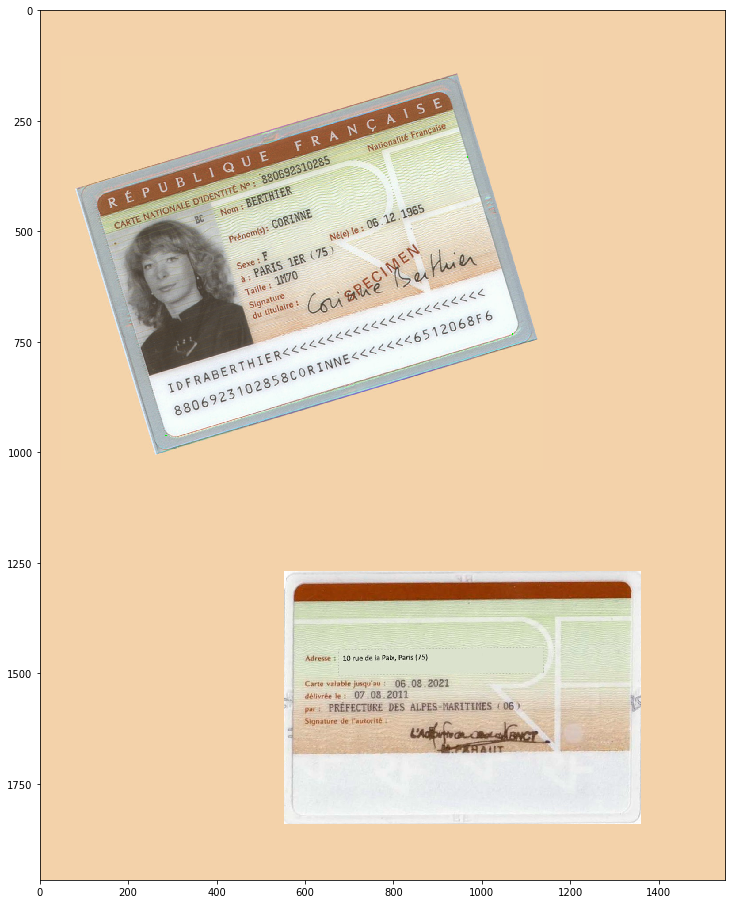

In [98]:
plt.imshow(im_target)